# Tehtävä 2-1. Aihe: Neuroverkko käsin: 4 pistettä

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Iina Pirinen'
student_id = 'AB7766'

Tehtävässä on määritetty koordinaattipareja, joiden avulla on piirretty kaksi eri väristä pisteitä.
Tavoitteena on luoda neuroverkko, joka jakaa kuvaajan punaiseen ja siniseen alueeseen.
Kun kuvaajaan piirretään uusi piste ja pisteen koordinaatit syötetään neuroverkolle, neuroverkko ennustaa,
minkä värinen piste on ja samalla sen, että millä todennäköisyydellä se on sen värinen.

1. Luo opetusdatan koordinaattipisteet sekä värit ominaisuuksiin ja ennustettaviin arvoihin.
2. Luo neuroverkkoluokka, jonka rakenne on:
    * Sisääntulokerros, jossa on kaksi neuronia (x, y) - eli koordinaatit pisteelle
    * Yksi piilotettua kerros, jossa on 6 neuronia ja aktivointifunktiona sigmoid.
    * Ulostulokerros, jossa yksi neuroni ja aktivointifunktiona sigmoid.
    * Ulostulokerroksen tulos on siis numeerinen arvo (float) väliltä [0, 1]
3. Luo funktiot, joiden avulla lasket neuroverkon ennustuksen syöttödatalle (forwardpropagation) ja päivität yhteyksien painoarvoja virheen avulla (backpropagation)
4. Syötä koulutusdata 1000 kertaa neuroverkon läpi.
    * Syötä jokaisella kierroksella koulutusdata rivi riviltä neuroverkon läpi ja päivitä painoarvot.
    * Tallenna kierroksen aikana virheet jokaiselle syötölle, ja lisää kierroksen virheistä keskiarvo listaan. Piirrä kuvaaja siitä, kuinka virhe muuttuu koulutuksen aikana
5. Ennusta neuroverkolla (float-arvo), minkä värinen on piste: [0.5, 8.7]. Kuinka tarkka ennuste mielestäsi on?
6. Ennusta neuroverkolla (float-arvo), minkä värinen on piste: [15, -15]. Kuinka tarkka ennuste mielestäsi on?
7. Tutki miten backpropagation()-metodin learning_rate-argumentin muutos vaikuttaa (0.01 -- 0.001) tulokseen?
8. Tutki miten make_blobs()-funktion n_samples-ominaisuuden muuttaminen vaikuttaa tulokseen?
9. Tutki miten make_blobs()-funktion cluster_std-ominaisuuden muuttaminen vaikuttaa tulokseen?


Vinkkejä:
* Piirrä neuroverkon rakenne piirrustusohjelmalla tai paperille, näet silloin yhteyksien määrän jokaisessa kerroksessa.
* Käytä olemassa olevaa ratkaisua materiaaleista, lisää siihen tarvittavat laskut jokaiselle kerrokselle.

In [2]:
import numpy as np

# Tehtävän toteutus - tämä on valmis luokka käytettäväksi
class NeuralNetwork:
    def __init__(self):
        self.weights1 = np.random.rand(2, 6)
        self.weights2 = np.random.rand(6, 1)

    def __init__(self, input_neurons, hidden_neurons):
        self.weights1 = np.random.rand(input_neurons, hidden_neurons)
        self.weights2 = np.random.rand(hidden_neurons, 1)

    # Virhefunktio
    def loss_function(self, true, prediction):
        return 0.5 * (true - prediction) ** 2

    # Virhefunktion derivaatta
    def loss_function_derivative(self, true, prediction):
        return true - prediction

    # Sigmoid funktio
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Sigmoidin derivaatta
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    # Neuroverkon läpikäynti
    def forwardpropagation(self, X, y):
        self.X = X
        self.y = y
        self.layer1 = self.sigmoid(np.dot(self.X, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))

        # lasketaan häviö eli neuroverkon ennustuksen etäisyys oikeasta arvosta
        self.loss = self.loss_function(self.y, self.output)

    # Painoarvojen päivitys backpropagation - menetelmällä
    def backpropagation(self, learning_rate):
        output_error = self.loss_function_derivative(self.y, self.output)
        output_delta = output_error * self.sigmoid_derivative(self.output)
        weights2_adjustment = np.dot(self.layer1.T, output_delta)

        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        weights1_adjustment = np.dot(self.X.T, layer1_delta)

        self.weights1 += learning_rate * weights1_adjustment
        self.weights2 += learning_rate * weights2_adjustment


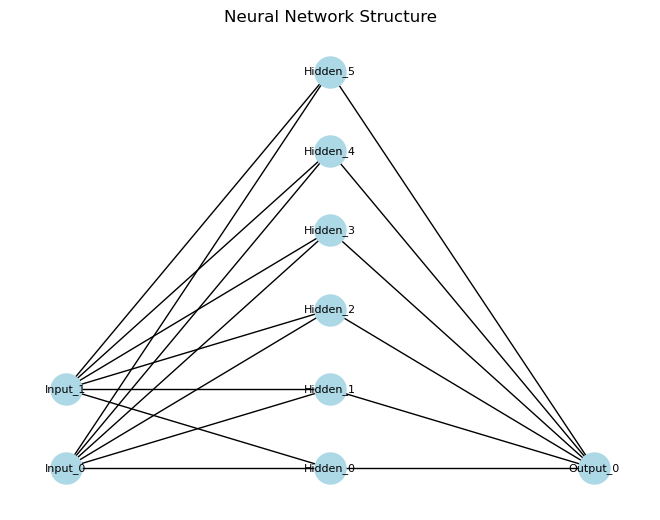

In [3]:
# Piirretään kuva neroverkosta, jotta se on helpompi ymmärtää käyttämällä networkx -pakettia

import matplotlib.pyplot as plt
import networkx as nx

# Määritetään neuronien määrä jokaisessa kerroksessa
input_layer_neurons = 2
hidden_layer_neurons = 6
output_layer_neurons = 1

# Luodaan graafi
G = nx.Graph()

# Lisää nodeja jokaiselle tasolle
for i in range(input_layer_neurons):
    G.add_node(f'Input_{i}', pos=(0, i))

for i in range(hidden_layer_neurons):
    G.add_node(f'Hidden_{i}', pos=(1, i))

for i in range(output_layer_neurons):
    G.add_node(f'Output_{i}', pos=(2, i))

# Lisää edge kerrosten väliin
for i in range(input_layer_neurons):
    for j in range(hidden_layer_neurons):
        G.add_edge(f'Input_{i}', f'Hidden_{j}')

for i in range(hidden_layer_neurons):
    for j in range(output_layer_neurons):
        G.add_edge(f'Hidden_{i}', f'Output_{j}')

# Nodejen paikat
pos = nx.get_node_attributes(G, 'pos')

# Piirretään graafi
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_color='black')
plt.title('Neural Network Structure')
plt.show()


 `create_dots_and_labels()`: luodaan pisteet ja nimekkeet sekä nimikkeiden pohjalta asetetaan RGB-väri pisteelle.
 * Opiskelijan tulee toteuttaa seuraava: Luo väritaulukko, jossa väri on `[label: 0: "red" tai 1: "blue"]`
 * Selvitä miten `make_blobs()` toimii

 `train_neural_network()`: Kouluttaa neuroverkon ja tallentaa häviön joka epoch-kierroksen jälkeen (valmis toteutus)

ks. **TODO** -kohdat, jotka vaativat oman koodin kirjoittamista

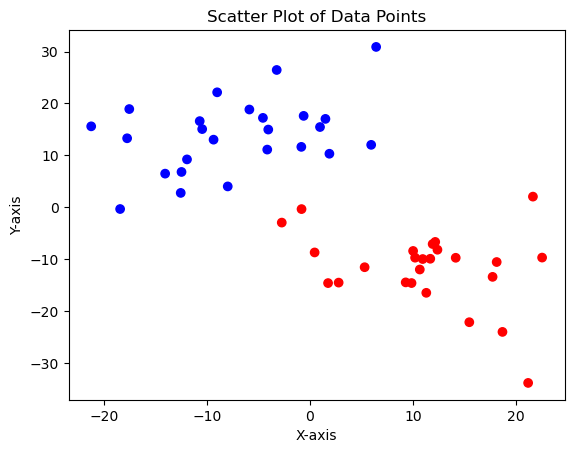

In [4]:
# funktio palauttaa taulukon, jossa on [dots, labels, colors]
from sklearn.datasets import make_blobs

# Luo opetusdatan koordinaattipisteet sekä värit ominaisuuksiin ja ennustettaviin arvoihin.
def create_dots_and_labels(n_samples, cluster_std):

    dots, labels = make_blobs(n_samples=n_samples, centers=2, cluster_std=cluster_std, center_box=(-20, 20), random_state=151)
    colors = []
    
    for label in labels:
        if label == 0:
            colors.append('red')
        elif label == 1:
            colors.append('blue')

    return [dots, labels, colors]

dots, labels, colors = create_dots_and_labels(50, 8)

# Create a scatter plot
plt.scatter(dots[:, 0], dots[:, 1], c=colors)
plt.title('Scatter Plot of Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [5]:
# Kouluttaa neuroverkon ja tallentaa häviön joka epoch-kierroksen jälkeen (valmis toteutus)
def train_neural_network(ntwrk, train_X, train_y):
    losses_arr = []  # tallentaa kierroksen virheet
    epochs = 1000
    for epoch in range(epochs):
        batch_losses = []
        # Käydään jokaisessa kierroksessa jokainen koordinaattipari läpi
        for X, y in zip(train_X, train_y):
            ntwrk.forwardpropagation(np.array([X]), np.array([y]))
            # TODO: Tutki Miten learning_rate muutos vaikuttaa (0.01 - 0.001) tulokseen?
            ntwrk.backpropagation(learning_rate=0.01)
            batch_losses.append(ntwrk.loss[0])
        losses_arr.append(np.average(batch_losses))  # lasketaan keskiarvo yhden kierroksen virhearvoista
    return losses_arr

* Määritetään koulutusdata ja luodaan neuroverkko
    * create_dots_and_labels
* Piirretään pisteet (kuviotyyppinä `scatter plot`)
* Koulutetaan neuroverkkoa  ja otetaan joka kierroksen jälkeen neuroverkon häviö ylos

In [6]:
network = NeuralNetwork(input_neurons=2, hidden_neurons=6)
train_X, train_y, colors = create_dots_and_labels(50,8)
losses = train_neural_network(network, train_X, train_y)

Piirretään neuroverkon häviöt

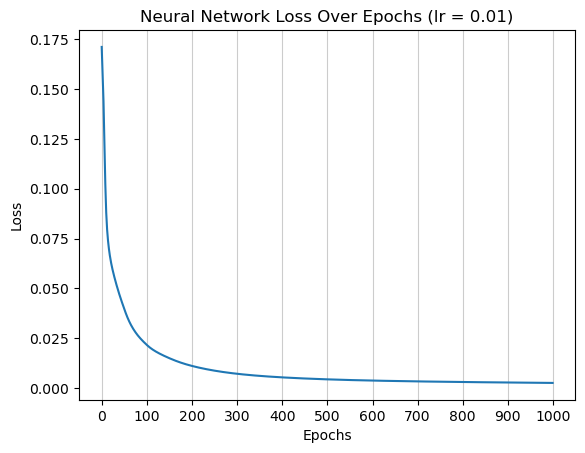

In [7]:
# TODO: Piirretään neuroverkon häviöt
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title('Neural Network Loss Over Epochs (lr = 0.01)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0, 1100, step=100))
plt.grid(axis='x', color='0.8')
plt.show()

## make_blobs()

sklearn.datasets.make_blobs on sklearn-kirjaston tarjoama toiminto, joka luo synteettisiä tietojoukkoja klusterointi- ja luokitustehtäviä varten. Tätä toimintoa käytetään yleisesti satunnaisten datapisteiden ja klusterien luomiseen.

- n_samples: määrittää tietojoukkoon luotavien tietopisteiden kokonaismäärän. Jokainen datapiste edustaa havaintoa.
- centers: ilmaisee klusterien määrän. Tietopisteet luodaan näiden klusterikeskusten ympärille.
- cluster_std: Tämä parametri ohjaa klusterien keskihajontaa. Suurempi arvo johtaa useammin hajaantuneisiin ja päällekkäisiin klustereihin, kun taas pienempi arvo luo tiiviimpiä klustereita.
- center_box: määrittää koordinaattialueen, johon klusterin keskipisteet voidaan sijoittaa. Oletusarvo on (-10.0, 10.0), mikä tarkoittaa, että klusterikeskukset luodaan neliön sisällä, jonka kulmat ovat (-10.0, -10.0) ja (10.0, 10.0).
- random_state: Jos halutaan toistettavia tuloksia, voidaan määrittää siemenarvon satunnaislukugeneraattorille käyttämällä random_state-komentoa. Tämä varmistaa, että sama tietojoukko luodaan aina, kun suoritetaan koodi samalla random_state-arvolla.

## Epochs (kierrokset)

Silmukka "for epoch in range(epochs)", jossa epoch (kierros) = 1000, on se osa, jossa syötetään harjoitusdataa neuroverkon läpi 1000 kertaa. Jokaista tämän silmukan iteraatiota kutsutaan kierrokseksi, ja jokaisen kierroksen aikana opetusdata välitetään neuroverkon läpi.

Joten kun asetetaan kierros arvoon 1000 ja suoritetaan opetusfunktio, neuroverkkoa harjoitetaan käsittelemällä opetusdataa yhteensä 1000 kertaa, päivittämällä sen painoja ja parantamalla sen suorituskykyä vähitellen.

## Learning rate

Oppimisnopeus on hyperparametri, jota käytetään koneoppimismallien koulutuksessa, mukaan lukien neuroverkot. Sillä on ratkaiseva rooli määritettäessä, kuinka nopeasti tai hitaasti malli oppii harjoitustiedoista. Oppimisnopeus on pieni positiivinen arvo, joka skaalaa askelkoon harjoitusprosessin aikana.

**Oppimisasteen vaikutus**

- Suuri oppimisnopeus: Jos oppimisnopeus on asetettu liian korkeaksi, malli saattaa hypätä yli optimaalisista parametriarvoista. Toisin sanoen koulutusprosessi saattaa epäonnistua konvergenssissa, ja häviö voi pikemminkin kasvaa kuin pienentyä. (Konvergenssi, konvergoituminen, on mallin koulutuksen kohta, jonka jälkeen muutokset oppimisnopeudessa laskevat ja mallin tuottamat virheet koulutuksessa minimoituvat.)
- Pieni oppimisnopeus: Jos oppimisnopeus on liian pieni, koulutusprosessi on erittäin hidas, koska malli tekee pieniä päivityksiä parametreihin jokaisen iteroinnin aikana. Vaikka se saattaa konvergoitua, se voi kestää kauan.

Alla olevista kuvaajista huomataan, miten esimerkiksi learning_rate arvolla 0.001 oppiminen joka kierroksella on hitaampaa, mutta tässä tapauksessa päästään n. 1000 kierroksella kuitenkin suurinpiirtein samaan häviöön.

![](./img/plot.png)



### Lasketaan ennusteet
* laske `output1`-muuttujaan neuroverkon ennuste syötteelle `[0.5, 8.7]`.
* laske `output2`-muuttujaan neuroverkon ennuste syötteelle `[-30, -30]`.


In [8]:
test_X_nn = np.array([0.5, 8.7])

layer1_output = network.sigmoid(np.dot(test_X_nn, network.weights1))
output1 = network.sigmoid(np.dot(layer1_output, network.weights2))

test_X_nn2 = np.array([15, -15])

layer1_output2 = network.sigmoid(np.dot(test_X_nn2, network.weights1))
output2 = network.sigmoid(np.dot(layer1_output2, network.weights2))


In [9]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
print(output1)
print(output2)

[0.955507]
[0.0336094]


## Tulokset

- Ennusteen arvo ensimmäiselle syötteelle on pyöristettynä 1, joten tällöin pisteen [0.5, 8.7] värin tulisi olla sininen.
- Ennusteen arvo toiselle syötteelle on pyöristettynä 0, joten tällöin pisteen [15, -15] värin tulisi olla punainen.

Datapisteiden scatter plottia tutkimalla, voidaan myös silmämääräisesti tulkita samalla tavalla kuin neuroverkko on ennustanut, joten tämän testin perusteella neuroverkko on ennustanut 100% oikein pisteiden värin. Tulokset ovat myös hyvin lähellä 0 tai 1, eikä kaukana kuten vaikka 0.45 ja 0.61, joten voisi päätellä, että ennusteet ovat tarkkoja. 

**cluster_std** -parametrin pienentäminen arvoon 2 yllättäen hieman huononti ennusteiden tarkkuutta. Syötteen [0.5, 8.7] ennuste tippui 0.1289 yksikköä, minkä kyllä pystyy selittämään sillä, että nyt kun klusterit ovat "tiiviimmin" niin piste [0.5, 8.7] on kauempana muista pisteistä. Toisen syötteen [15, -15] annuste huononi 0.0115 yksikköä, mikä on hyvin vähän, mutta huononi kuitenkin. Lienee johtuvan samasta syystä kuin ensimmäisen syötteen syy. Myös parametrin nostaminen lukuun 15 jonkin verran huononti ennusteita (syöte 1: 0.0153 yksikköä, syöte 2: 0.0246 yksikköä). cluster_std:n nostaminen hajaannuttaa pisteitä enemmän, jolloin myös ennustaminen vaikeutuu. Tämä on luultavasti syynä ennusteiden huononemiseen.

**n_samples** arvon muuttaminen suurempaan tai isompaan (kokeiltu arvoja 10, 200, 500) ei juurikaan vaikuttanut tuloksiin. Ennusteet muuttuivat hieman suuntaan tai toiseen, mutta suurin muutos oli 0.0959 yksikköä (n_samples=5, ensimmäinen syöte), mikä ei ole paljoa.

**learning_ratea** muuttamalla pienemmästä arvosta 0.001 suurempaa arvoa 0.01 kohti, ennusteiden tarkkuus muuttuu paremmaksi. Kierrosten määrän lisääminen voisi auttaa mallia tarkentamaan parametrejaan, varsinkin kun oppimisnopeus on pieni. Pienemmällä oppimisnopeudella konvergoituminen kestää kauemmin ja optimaalisten parametrien saavuttaminen saattaa vaatia enemmän kierroksia.

# Tehtävä 2-2
# Aihe: Yksinkertainen neuroverkko Keras Sequential API:lla (max. 3 p)

Koulutetaan yksinkertainen neuroverkko **Keras**-rajapinnalla käyttäen `titanic-dataa`
Datan saat osoitteesta: `https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv`

Tehtävästä on löydyttävä vaiheet:
1. Valitse Titanic-datasta vain kolme-neljä tärkeää feature-piirrettä tehtävään
   * tästä aineistosta on ollut esimerkkejä jo koneoppimisen puolella (ja niitä voi lainata tai soveltaa), mutta tätä voi halutessaan myös itse tutkia tarkemmin
2. Luo neuroverkko (käytä `tf.keras.Sequential()`-metodia)
3. Määritä häviöfunktio ja optimisaattori (käytä `model.compile()`-metodia)
4. Kouluta neuroverkko (käytä `model.fit()`-metodia)
5. Vertaa neuroverkon antamia ennustuksia testidataan (käytä `model.evaluate()`-metodia)
6. Tulosta välikierrosten (`epoch`) tulokset konsolille.
 ```
 23/23 [==============================] - 0s 687us/step - loss: 2.2182 - accuracy: 0.6236
 Epoch 2/1000
 23/23 [==============================] - 0s 702us/step - loss: 1.4468 - accuracy: 0.6238
 ```
7. Muuta neuroverkon rakennetta ja yritä dokumentoida neuroverkko, jolla sait parhaat tulokset.

Myös epoch-kierrosmäärien vaikutusta voi testata, mutta arvauksena on, että max. 1000 opetuskierrosta riittää varmasti hyvin.
Useita neuroverkkorakenteita kannattaa kokeilla ja hieman vertailla oppimistuloksia.


### Datan esikäsittely + Keras - Titanic-data

Versio, jossa pyritään hakemaan 3-4 tärkeintä piirrettä, jotka korreloivat eniten `survived`-kentän (luokkamuuttujan) kanssa.


In [10]:
# Tehtävän toteutus
# Datan Esikäsittely

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv')

print(df.head())
# TODO: esikäsittelyn loppu toteutus

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
# Jos tulee sertifikaatti vanhentunut -virhe, niin ao. koodi auttaa.
# Toinen vaihtoeho on että vain kopioi CSV-tiedoston omaan repoon tehtävän tekemistä varten
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv')


### Aineiston jakaminen
* Irrotetaan ennustettava muuttuja datasta.
* jaetaan data opetus- ja testidataan.


In [12]:
# Tehtävän toteutus

# TODO: Irrotetaan datasta ennustettava luokkamuuttuja

# TODO: Jako opetus- ja testidataan

### Tehtävän toteutus Keras-kirjastoa käyttäen

Luodaan neuroverkko, jossa on `Dense`-kerroksia peräkkäin (`Sequential`). Määritä nämä kaksi parametriä ainakin:
* `units` – dimensionality of the output space.
* `activation` – Activation function to use. If you don't specify anything, no activation is applied

Huom! Useita neuroverkkorakenteita kannattaa kokeilla ja hieman vertailla oppimistuloksia.

In [13]:
# Tehtävät toteutus
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

# TODO: Luodaan neuroverkko
#
# model = tf.keras.Sequential([
#  tf.keras.layers.Dense(...),

ModuleNotFoundError: No module named 'tensorflow'

* Määritetään häviöfunktio ja optimisaattori.
* Koulutetaan neuroverkko (epochs=100-1000)
* Verrataan tuloksia testidataan

In [ ]:
# Tehtävän toteutus

# TODO: Käännä malli
# TODO: Kouluta neuroverkko n epoch-kierrosta

# TODO: Vertaa saatuja oppimistuloksia testidataan
results = [.001, .001] # TODO: Alustettu ettei tule virheitä. Tulokset laskettava tehtävä

In [ ]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan funktion model.evaluate() tulos.
# TODO: Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'] neuroverkon ennustuksien tarkkuuden määrittelemiseksi.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

Tehtävän tuloksesta:
Test Accuracy: > n. 80 % -- on jo aika hyvä, mutta toki parempaakin saa hakea (jos haluaa käyttää paljon ylimääräistä aikaa)
